# Part 1

In [1]:
#Refrence- Lab files (Week 7,8,9) provided on Blackboard by Patrick Mannion in the module CT5134 Agents, Multi-Agent Systems and Reinforcement Learning


import numpy as np
import matplotlib.pyplot as plt

# global variables
BOARD_ROWS = 5
BOARD_COLS = 5
WIN_STATE = (4, 4)  # fixed the position of winning state
LOSE_STATE = [(1, 0), (1, 3), (3, 1), (4, 2)]  # fixed the name of the losing states variable
START = (0, 0)
DEBUG = True  # set to true to enable verbose output



class State:
    def __init__(self, state=START):        
        self.state = state
        self.isEnd = False        

    def get_reward(self):
        if self.state == WIN_STATE:
            return 10       
        elif self.state in LOSE_STATE:
            return -5
        else:
            return -1

    def is_end_func(self):
        if (self.state == WIN_STATE) or (self.state in LOSE_STATE):
            self.isEnd = True

    def nxt_position(self, action):
        if action == 0:                
            nxt_state = (self.state[0] - 1, self.state[1])
        elif action == 1:
            nxt_state = (self.state[0] + 1, self.state[1])
        elif action == 2:
            nxt_state = (self.state[0], self.state[1] - 1)
        else:
            nxt_state = (self.state[0], self.state[1] + 1)
            
        if (nxt_state[0] >= 0) and (nxt_state[0] <= 4):
            if (nxt_state[1] >= 0) and (nxt_state[1] <= 4):
                return nxt_state  # if next state legal
        return self.state  # Any move off the grid leaves state unchanged

#Part 2a

In [2]:
#Refrence- Lab files (Week 7,8,9) provided on Blackboard by Patrick Mannion in the module CT5134 Agents, Multi-Agent Systems and Reinforcement Learning

class Agent:

    def __init__(self,alpha,gamma,epsilon):
        self.states = []
        self.actions = [0, 1, 2, 3]  # up, down, left, right
        self.State = State()
        self.discount = gamma
        self.lr = alpha
        self.eps = epsilon
        self.reward_list=[]
        self.min_epsilon=0.01
        self.decay_rate=0.001
        self.eps_list=[]
        
        # initialise state values
        self.action_values = {}        
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.action_values[(i, j, k)] = 0.0  # set initial value to 0, for Q(s,a)
        
        self.new_action_values = []

    def choose_action(self, current_state):
        # choose action according to policy eps-greedy
        if np.random.uniform(0, 1) <= self.eps:
            action = np.random.choice(self.actions)
            if DEBUG:
                print("selecting random action")
        else:
            action = self.best_action(current_state)
        return action

    def take_action(self, action):
        position = self.State.nxt_position(action)
        self.State.state = position

    def best_action(self, state):
        best = -1
        max_val = -100000000
        for a in self.actions:
            q_val = self.action_values[state[0], state[1], a]
            if q_val >= max_val:
                max_val = q_val
                best = a
        return best

    def q_max(self, state):
        best = self.best_action(state)
        return self.action_values[state[0], state[1], best]

    def q_learning(self, episodes,decay):
        # Q-learning implementation
        x = 0  # episode counter
        while x < episodes:
            rewards=0
            # Init S
            self.State.isEnd = False
            self.State.state = START  # Re init S Start state
            step = 0

            if DEBUG:
                print("**** Beginning episode", x, "****")
                self.show_values()

            while True:  # repeat for each step of the episode (until S is terminal)

                # Store current state for Q update
                current_state = (self.State.state[0], self.State.state[1])

                # Choose action A from S using policy derived from Q (e-greedy)
                action = self.choose_action(current_state)

                # Take action A observe R and next State S'
                self.take_action(action)
                reward = self.State.get_reward()
                rewards+=reward
                self.State.is_end_func()
                next_state = self.State.state[0], self.State.state[1]

                # Update state action values
                old_q = self.action_values[current_state[0], current_state[1], action]
                max_q = self.q_max(next_state)
                new_q = old_q + self.lr * (reward + self.discount * max_q - old_q)
                self.action_values[current_state[0], current_state[1], action] = new_q

                step += 1
                if DEBUG:
                    print("step", step, "state", current_state, "action", action, "reward", reward,
                          "next_state", next_state, "old_q", old_q, "max_q", max_q, "new_q", new_q)

                # Check if s is terminal
                if self.State.isEnd:
                    break

                # S <- S' automatically when I took the action                    

            x += 1
            self.reward_list.append(rewards)

            #Refrence for Eps decay- https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187
            if decay==True:
              self.eps = max(self.min_epsilon, np.exp(-self.decay_rate*x))

            self.eps_list.append(self.eps)

        return self.reward_list, self.eps_list

    def show_values(self):
        for i in range(0, BOARD_ROWS):
            print('---------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -1000
                for a in self.actions:
                    nxt_value = self.action_values[(i, j, a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value                
                out += str(round(mx_nxt_value, 3)).ljust(6) + ' | '
            print(out)

        print('---------------------------------------------')

    def show_values1(self, f):
        for i in range(0, BOARD_ROWS):
            print('---------------------------------------------')
            f.write('---------------------------------------------\n')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -1000
                for a in self.actions:
                    nxt_value = self.action_values[(i, j, a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value                
                out += str(round(mx_nxt_value, 3)).ljust(6) + ' | '
            print(out)
            f.write(out + '\n') # modified to include a newline character at the end
        print('---------------------------------------------')
        f.write('---------------------------------------------\n')


In [22]:
#Refrence- https://www.geeksforgeeks.org/python-pandas-series-rolling/
import pandas as pd
def plot(plot1, plot2):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))

    axs[0].plot(pd.Series.rolling(pd.DataFrame(plot1), window=100).mean())
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Q-Learning Learning Curve')

    axs[1].plot(plot2)
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Epsilon')
    axs[1].set_title('Epsilon Decay Graph')

    plt.show()

#Part 2b - i

In [5]:
#Refrence- Lab files (Week 7,8,9) provided on Blackboard by Patrick Mannion in the module CT5134 Agents, Multi-Agent Systems and Reinforcement Learning

if __name__ == "__main__":
    f1 = open("2b_i.txt", "a")
    ag = Agent(alpha=0.5,gamma=0.9,epsilon=0.10)
    reward_list1,eps_list1=ag.q_learning(10000,decay=False)
    ag.show_values1(f1)
    f1.close()

Streaming output truncated to the last 5000 lines.
| -2.562 | -2.5   | 0.0    | 10.0   | 0.0    | 
---------------------------------------------
step 1 state (0, 0) action 3 reward -1 next_state (0, 1) old_q -0.4340620000000006 max_q 0.6288199999999993 new_q -0.4340620000000006
selecting random action
step 2 state (0, 1) action 0 reward -1 next_state (0, 1) old_q -0.4340620000000006 max_q 0.6288199999999993 new_q -0.4340620000000006
step 3 state (0, 1) action 3 reward -1 next_state (0, 2) old_q 0.6288199999999993 max_q 1.8097999999999992 new_q 0.6288199999999993
selecting random action
step 4 state (0, 2) action 3 reward -1 next_state (0, 3) old_q 1.8097999999999992 max_q 3.121999999999999 new_q 1.8097999999999992
step 5 state (0, 3) action 3 reward -1 next_state (0, 4) old_q 3.121999999999999 max_q 4.579999999999998 new_q 3.121999999999999
step 6 state (0, 4) action 1 reward -1 next_state (1, 4) old_q 4.579999999999998 max_q 6.199999999999999 new_q 4.579999999999998
step 7 state (1, 4

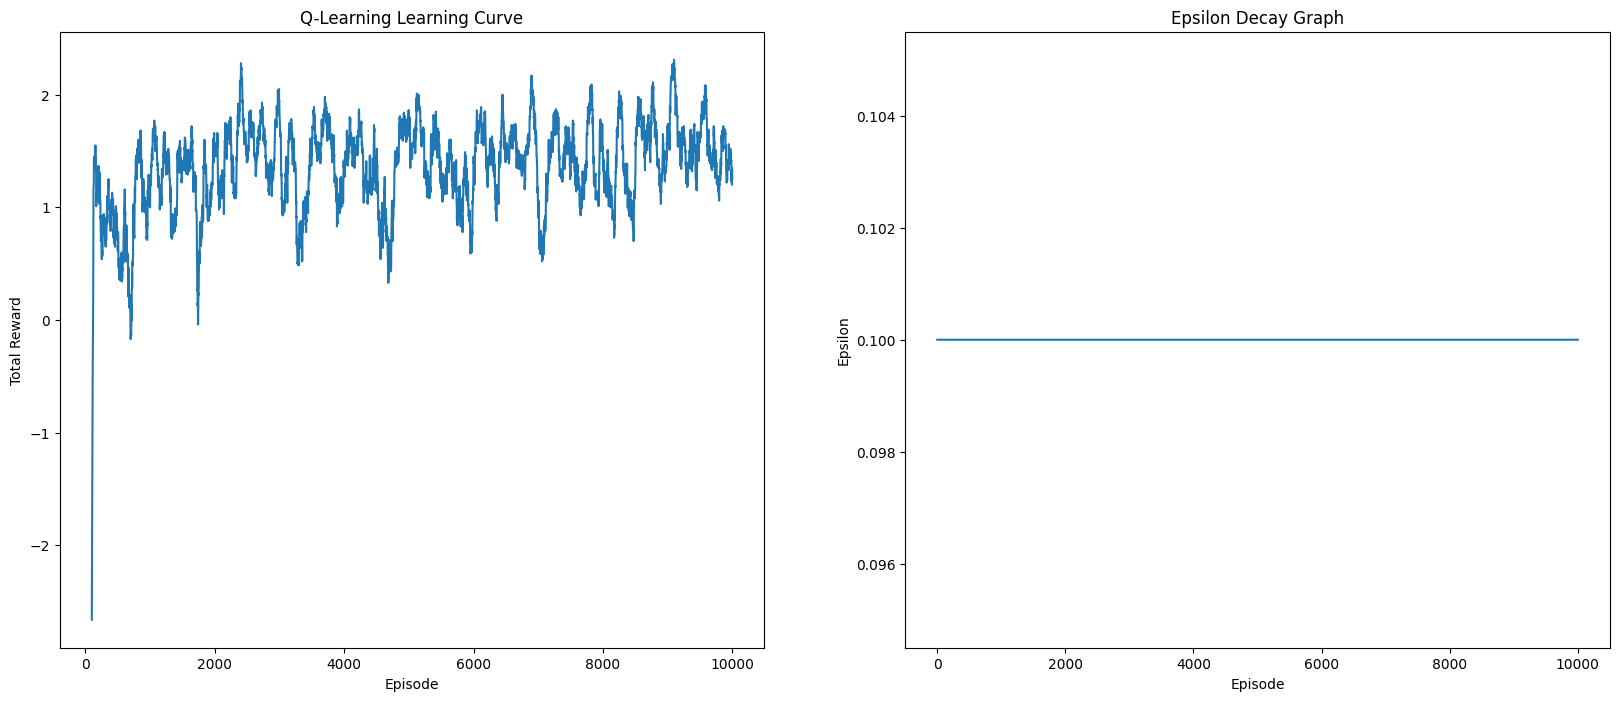

In [23]:
plot(reward_list1, eps_list1)

#Part 2b - ii

In [7]:
#Refrence- Lab files (Week 7,8,9) provided on Blackboard by Patrick Mannion in the module CT5134 Agents, Multi-Agent Systems and Reinforcement Learning
if __name__ == "__main__":
    f2 = open("2b_ii.txt", "a")
    ag1 = Agent(alpha=0.5,gamma=0.9,epsilon=0.10)
    reward_list2,eps_list2=ag1.q_learning(10000,decay=True)
    ag1.show_values1(f2)
    f2.close()

Streaming output truncated to the last 5000 lines.
selecting random action
step 3 state (0, 2) action 0 reward -1 next_state (0, 2) old_q 0.6288199999999993 max_q 1.8097999999999992 new_q 0.6288199999999993
step 4 state (0, 2) action 3 reward -1 next_state (0, 3) old_q 1.8097999999999992 max_q 3.121999999999999 new_q 1.8097999999999992
step 5 state (0, 3) action 3 reward -1 next_state (0, 4) old_q 3.121999999999999 max_q 4.579999999999998 new_q 3.121999999999999
step 6 state (0, 4) action 1 reward -1 next_state (1, 4) old_q 4.579999999999998 max_q 6.199999999999999 new_q 4.579999999999998
step 7 state (1, 4) action 1 reward -1 next_state (2, 4) old_q 6.199999999999999 max_q 8.0 new_q 6.199999999999999
step 8 state (2, 4) action 1 reward -1 next_state (3, 4) old_q 8.0 max_q 10.0 new_q 8.0
step 9 state (3, 4) action 1 reward 10 next_state (4, 4) old_q 10.0 max_q 0.0 new_q 10.0
**** Beginning episode 9753 ****
---------------------------------------------
| -0.434 | 0.629  | 1.81   | 3.12

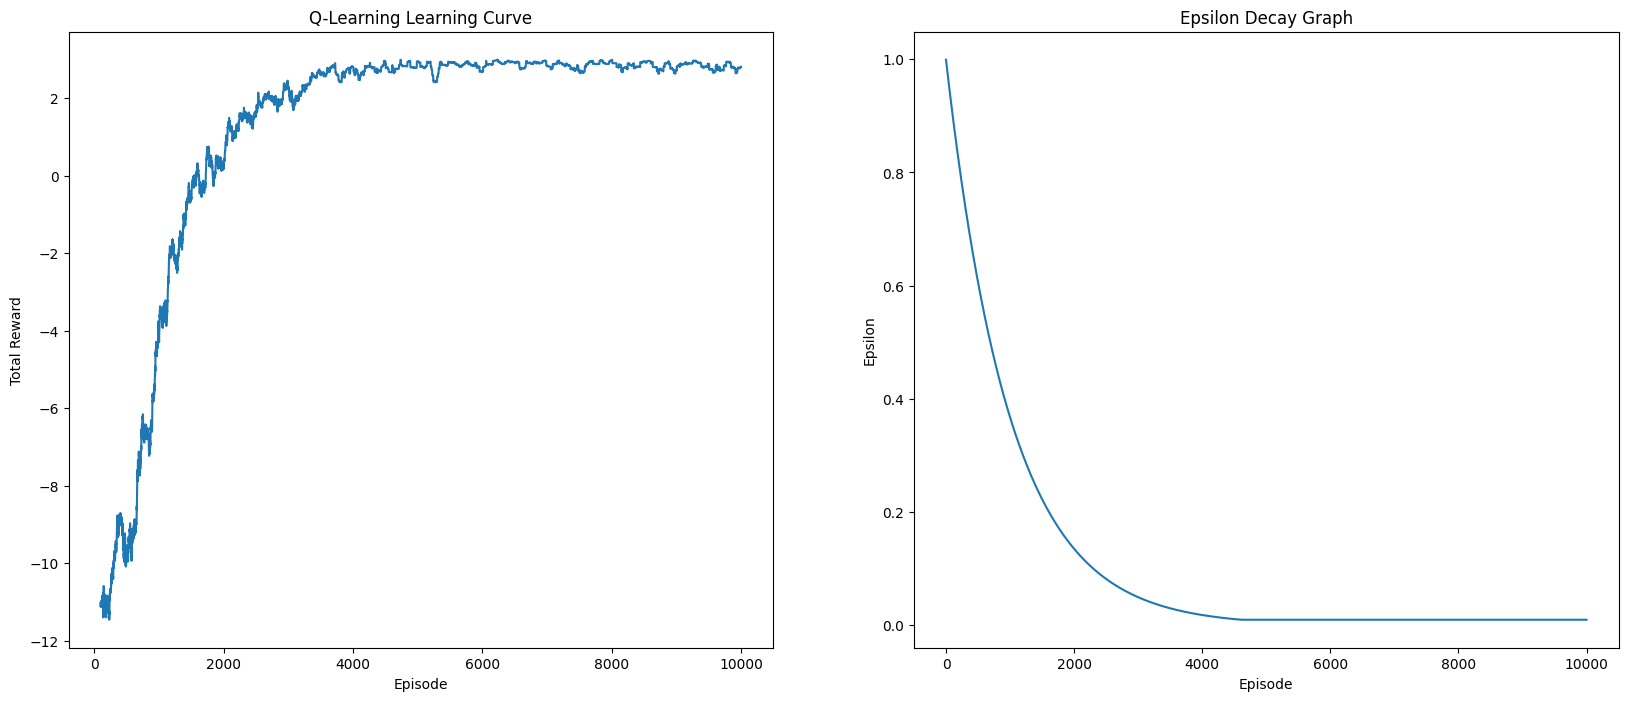

In [24]:
plot(reward_list2, eps_list2)

#Part 2b - iii

In [12]:
#Refrence- Lab files (Week 7,8,9) provided on Blackboard by Patrick Mannion in the module CT5134 Agents, Multi-Agent Systems and Reinforcement Learning
if __name__ == "__main__":
    f3 = open("2b_iii.txt", "a")
    ag2 = Agent(alpha=0.05,gamma=0.5,epsilon=0.05)
    reward_list3,eps_list3=ag2.q_learning(10000,decay=True)
    ag2.show_values1(f3)
    f3.close()

Streaming output truncated to the last 5000 lines.
step 7 state (2, 4) action 1 reward -1 next_state (3, 4) old_q 3.9999999999999867 max_q 9.999999999999982 new_q 3.9999999999999867
step 8 state (3, 4) action 1 reward 10 next_state (4, 4) old_q 9.999999999999982 max_q 0.0 new_q 9.999999999999982
**** Beginning episode 9752 ****
---------------------------------------------
| -1.906 | -1.813 | -1.625 | -1.473 | -0.719 | 
---------------------------------------------
| 0.0    | -1.625 | -1.25  | 0.0    | 0.999  | 
---------------------------------------------
| -1.616 | -1.25  | -0.5   | 1.0    | 4.0    | 
---------------------------------------------
| -1.546 | 0.0    | 0.996  | 4.0    | 10.0   | 
---------------------------------------------
| -1.512 | -1.476 | 0.0    | 8.16   | 0.0    | 
---------------------------------------------
step 1 state (0, 0) action 3 reward -1 next_state (0, 1) old_q -1.9062500000000044 max_q -1.8125000000000044 new_q -1.9062500000000044
step 2 state (0, 1)

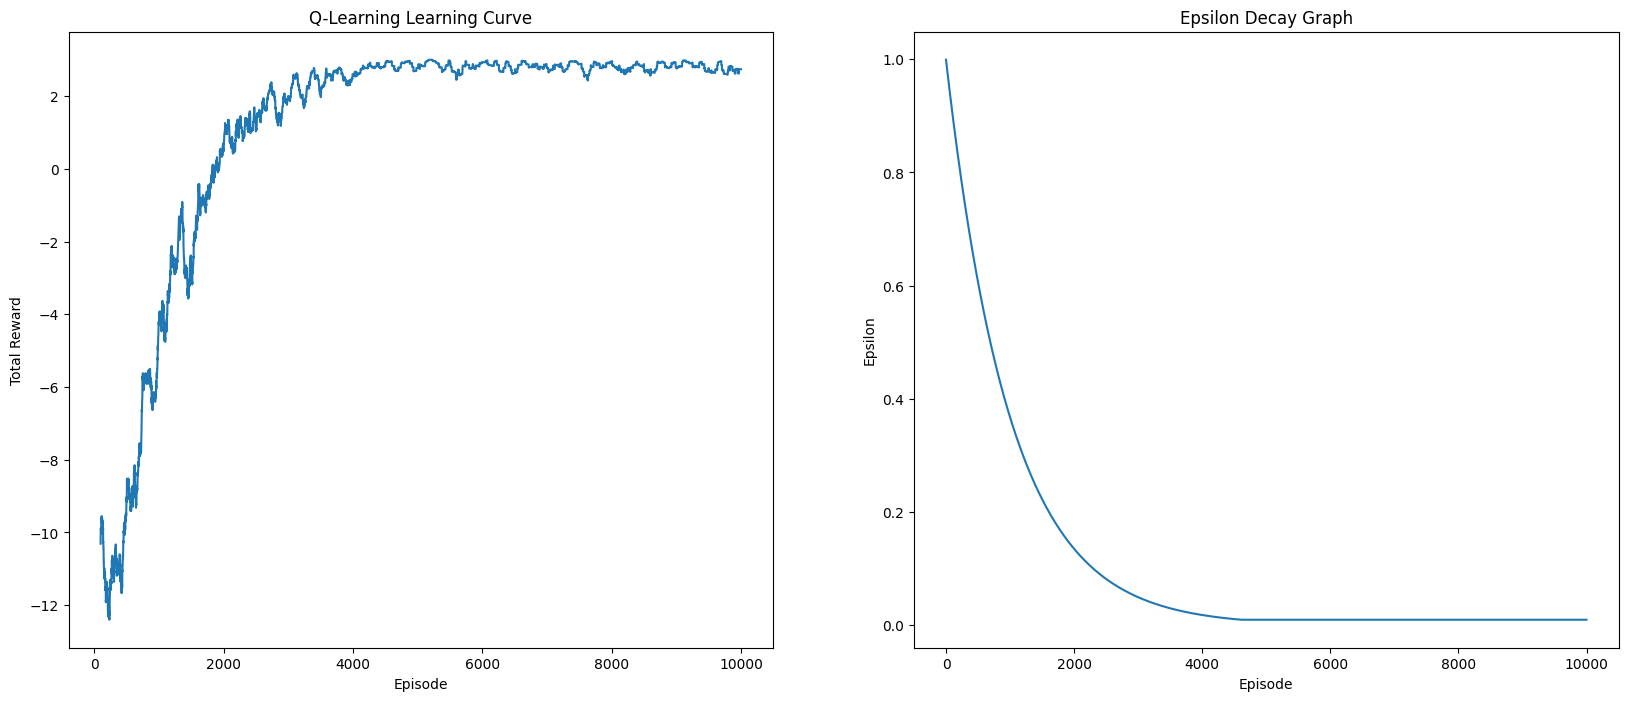

In [25]:
plot(reward_list3, eps_list3)